# 6. Line Search Methods

Problem 1

In [2]:

from autograd import grad
import autograd.numpy as anp
import matplotlib.pyplot as plt
import time

In [3]:
def goldsecsearch(f, a, b, niter):
    rho = (3 - anp.sqrt(5))/2
    citer = 0
    while citer < niter:
        a_prime = a + rho * (b - a)
        b_prime = a + (1 - rho) * (b - a)
        if f(a_prime) >= f(b_prime):
            a = a_prime
        else:
            b = b_prime
        citer += 1
    return (a + b)/2


The 'true' minimizer of $e^x - 4x$ satisfies $f' = e^x - 4 = 0$, so $x = ln(x)$.

In [4]:
f = lambda x: anp.exp(x) - 4*x
i = 1
t1 = time.clock()
while abs(goldsecsearch(f, 0, 3, i) - anp.log(4)) > 0.001:
    i +=1
tt = time.clock() - t1
print("Time: ",tt )
print('The optimizer needed',i - 1,' steps.')


Time:  0.0018890000000000295
The optimizer needed 12  steps.


Problem 2

In [5]:
from autograd import grad
import autograd.numpy as anp

In [6]:
def bisect(f, a, b, niter):
    citer = 0
    while citer < niter:
        m = (a + b)/2
        fp = grad(f)
        fpm = fp(m)
        if fpm < 0:
            a = m
        elif fpm > 0:
            b = m
        else:
            return m
        citer += 1
    return (a + b)/2

In [7]:
i = 1
t1 = time.clock()
while abs(bisect(f, 0, 3, i) - anp.log(4)) > 0.001:
    i +=1
tt = time.clock() - t1
print("Time: ",tt )
print('The optimizer needed',i - 1,' steps.')

Time:  0.012340999999999935
The optimizer needed 8  steps.


Observe that the bisection method took fewer steps, but needed more time.

Problem 3

In [8]:


def findMinimizer(x_0, fp, eps = 1e-5, x_1 =None, fpp = None, method = 'Newton'):
    dist = 1
    k = 1
    maxiter = 50/eps
    
    if method == 'Newton':
        while dist > eps and k < maxiter:
            x = x_0 - fp(x_0)/fpp(x_0)
            #print((x_0, fp(x_0), fpp(x_0), fp(x_0)/fpp(x_0)))
            dist = abs(x - x_0)/abs(x_0)
            x_0 = x
            k += 1
        #print(x)    
    if method == 'Secant':
        #print(dist>eps,k<maxiter)
        while dist > eps and k < maxiter:
            
            x_2 = x_1 - fp(x_1) * (x_1 - x_0)/(fp(x_1) - fp(x_0))
            dist = abs(x_2 - x_1)/abs(x_1)
            x_0 = x_1
            x_1 = x_2
            k += 1
        x = x_2
        
    if k < maxiter:
        print("The "+ str(method) + " method led to convergence.")
        return x
    else:
        print('Convergence failed.')

In [9]:
g = lambda x: x**2 + anp.sin(5*x)
gp = lambda x: 2 * x + 5 * anp.cos(5*x)
gpp = lambda x: 2 - 25 * anp.sin(5*x)
x_0 = 0


In [10]:
findMinimizer(x_0, fp = gp, fpp = gpp)

The Newton method led to convergence.


/Users/Jan/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in double_scalars


-1.4473142236328096

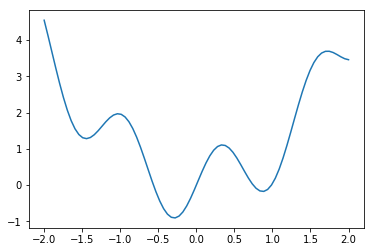

In [11]:
grid = anp.linspace(-2,2,80)
plt.plot(grid,g(grid))
plt.show()

Hence not the right minimizer.

In [12]:
findMinimizer(1, fp = gp, fpp = gpp)

The Newton method led to convergence.


0.87128108312270924

Still a no.

In [13]:
findMinimizer(-0.5, fp = gp, fpp = gpp)

The Newton method led to convergence.


-0.29083931499532345

This is the right one.

Problem 4

In [14]:
g = lambda x: x**2 + anp.sin(x) + anp.sin(10*x)
gp = lambda x: 2 * x + anp.cos(x) + 10 * anp.cos(10*x)

x_0 = 0
x_1 = -1

In [15]:
findMinimizer(x_0, gp,eps = 1e-5, x_1=x_1, method = 'Secant')

The Secant method led to convergence.


-0.16367722118191103

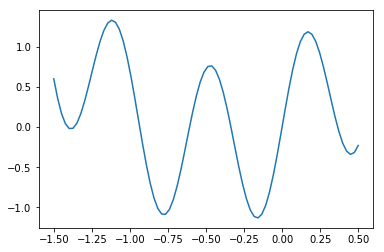

In [16]:
grid = anp.linspace(-1.5,0.5,80)
plt.plot(grid,g(grid))
plt.show()

Hence the function worked with this starting condition.

In [17]:
findMinimizer(x_0, gp,eps = 1e-5, x_1=0.5, method = 'Secant')

The Secant method led to convergence.


0.80868631362759957

In [18]:
findMinimizer(-0.5, gp,eps = 1e-5, x_1=0.5, method = 'Secant')

The Secant method led to convergence.


4.1521168874316112

As noted, the function is highly sensitive to the starting points.

Problem 5

In [19]:
def backtrack(f, Df, x_0, p, alpha = 1, c = 0.5, rho = 0.5):
    while f(x + alpha*p) > f(x) + c*alpha*Df(x).dot(p):
        alpha = rho*alpha
    return alpha

# Newton's Method

Problem 1

We just modify the minimizer slightly:

In [20]:

def findRoot(f, x_0, fp, eps = 1e-5, maxiter = 15, alpha = 1):
    dist = 1
    k = 1
    
    #maxiter = 50/eps
    
    while dist > eps and k < maxiter:
        x = x_0 - alpha * f(x_0)/fp(x_0)
            
        dist = abs(x - x_0)/abs(x_0)
        x_0 = x
        k += 1
        
    if k < maxiter:
        print("The Newton method led to convergence.")
        return x
    else:
        return x
        print('The function has not yet converged.')

In [21]:
f = lambda x: anp.exp(x) - 2
fp = lambda x: anp.exp(x)
x_0 = 2
xroot = findRoot(f, x_0, fp)
print(xroot)
f(xroot)

The Newton method led to convergence.
0.69314718056


0.0

In [22]:
import scipy.optimize as opt


opt.newton(f,x_0)

0.69314718055994551

In [23]:
f = lambda x: x**4 - 3
fp = lambda x: 4*x**3
x_0 = 2
xroot = findRoot(f, x_0, fp)
print(xroot)
anp.around(f(xroot),7)

The Newton method led to convergence.
1.3160740129524924


-0.0

In [24]:
import scipy.optimize as opt


opt.newton(f,x_0)

1.3160740129524926

The function works. 

Problem 2

In [25]:
def interestRoot(N1, N2, P1, P2, r_0 = 0.1):
    f = lambda x: P1*((1 + x)**N1 - 1) - P2*(1 - (1 + x)**(-N2))
    fp = lambda x: N1*P1*(1 + x)**(N1 - 1) - P2*N2*(1 + x) **(-N2 - 1)
    r = findRoot(f, r_0, fp)
    return r

In [26]:
interestRoot(30, 20, 2000, 8000)

The Newton method led to convergence.


0.038778432029673786

Problem 3

In [27]:

f = lambda x: anp.sign(x) * anp.power(anp.abs(x), 1./3)
fp = lambda x: (1/3) * anp.sign(x) * anp.power(anp.abs(x),-2./3)

def findRoot(f, x_0, fp, eps = 1e-5, maxiter = 15, alpha = 1):
    dist = 1
    k = 1
    
    #maxiter = 50/eps
    #print(dist > eps, k<maxiter)
    while dist > eps and k < maxiter:
        x = x_0 - alpha * f(x_0)/fp(x_0)
            
        dist = abs(x - x_0)
        x_0 = x
        k += 1
        
    if k < maxiter:
        #print("The Newton method led to convergence.")
        return x, k
    else:
        return x, k
        print('The function has not yet converged.')


In [28]:
print(findRoot(f, 0.01, fp, eps = 1e-5, maxiter = 15, alpha = 1)[0])



-1342177.28


In [29]:
findRoot(f, 0.01, fp, eps = 1e-5, maxiter = 15, alpha = 0.3)[0]

9.9999999999998196e-07

Problem 4

In [30]:

def alphaIter(f, x_0, fp, eps = 1e-5, maxiter = 15):
    agrid = anp.linspace(0.2, 0.4, 50)
    avals = anp.ones(len(agrid))
    
    for i in range(len(agrid)):
        avals[i] = findRoot(f, x_0, fp, eps = eps,
                                   maxiter= maxiter,
                                   alpha = agrid[i])[1]
    plt.plot(agrid, avals)

In [31]:
alphaIter(f, 0.01, fp, eps = 1e-5, maxiter = 15)

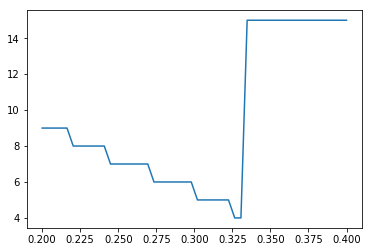

In [32]:
plt.show()

The optimal alpha is indeed closer to 0.3 than to 0.4 (indeed, we did not even converge for 0.4!).

Problem 5

In [33]:
def findvecRoot(f, x_0, Df, eps=1e-5, maxiter=15, alpha=1):
    
    if anp.isscalar(x_0):
        return findRoot(f, x_0, Df, eps, maxiter, alpha)
    else:
        for i in range(len(x_0)):
        
        k = 0
        dist = 1
        while dist > eps and k < maxiter:
            y = anp.linalg.solve(Df(x_0),f(x_0))
            x = x_0 - alpha * y
            dist =  anp.linalg.norm(x - x0)
            x_0 = x
        if k < maxiter:
            #print("The Newton method led to convergence.")
            return x, k
        else:
            return x, k
            print('The function has not yet converged.')    
            



In [34]:
f = lambda x, y : ( x**2 + (y - 1)**2, x + y - 1)

In [35]:
Df = grad(f)

In [39]:
findvecRoot(f, [1., -1.], Df, eps=1e-5, maxiter=15, alpha=1)

TypeError: <lambda>() missing 1 required positional argument: 'y'

In [40]:
f([1,3])




TypeError: <lambda>() missing 1 required positional argument: 'y'

In [41]:
def h(x,y):
    return x**2 + (y - 1)**2, x + y - 1

In [42]:
gradh = grad(h)

In [44]:
findvecRoot(h, (1., -1.), gradh, eps=1e-5, maxiter=15, alpha=1)

TypeError: h() missing 1 required positional argument: 'y'